<a href="https://colab.research.google.com/github/ghm8614/Python/blob/main/13_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13 Visualization

## 한글폰트 설정

In [ ]:
# 한글글꼴 설정
import matplotlib.pyplot as plt
plt.text( 0.3, 0.3, '가나다',size = 100)

In [ ]:
# colab에서는 적용 잘 안됨
from matplotlib import rc
rc('font',family = 'Malgun Gothic') # or 'HCR Dotum'

In [ ]:
# 나눔글꼴 설치
!apt-get install fonts-nanum*

In [ ]:
# 모든 폰트 출력해보기
import matplotlib.font_manager as fm

sys_font = fm.findSystemFonts()
sys_font

In [ ]:
# 폰트적용
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl # 마이너스 부호가 깨지는 것 방지
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font',family = font_name) # 폰트 설정
fm._rebuild() #폰트 적용
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지는 것 방지

## 1) Matplotlib 1

### 선형그래프

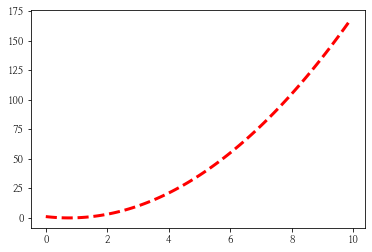

In [ ]:
import matplotlib.pyplot as plt   # plt.plot()
import numpy as np  # data생성을 위해 numby모듈사용

x = np.arange(0,10,0.1)  # arange(부터,까지,간격) :  배열함수
y = 2*x**2-3*x+1
plt.plot(x,y,'r--',lw=3)  # line width
plt.show()

### 산포도그래프

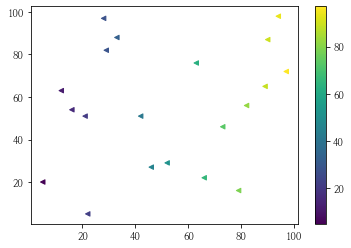

In [ ]:
import matplotlib.pyplot as plt   # plt.scatter()
import numpy as np   

# random모듈의 함수는 괄호안 전달인자 두개, numpy의 random모듈함수는 괄호안 전달인자 세개
x = np.random.randint(0,100,20) #난수에서 배운 random모듈과 다른 함수임
y = np.random.randint(0,100,20) #0부터100까지, 20개의 랜덤값을 만들어라
plt.scatter(x,y,c=x,s=20,marker='<') 
plt.colorbar() # bar에 색을 주는 함수, color를 x축에 줄거냐 y축에 줄거냐에따라 둘다가능
plt.show()

### 막대그래프 (세로)

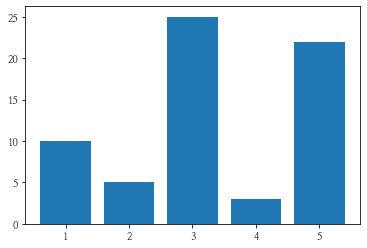

In [ ]:
import matplotlib.pyplot as plt   # plt.bar()
import numpy as np   

x = np.arange(1,6)  # 1부터(6-1)까지 배열로
y = [10,5,25,3,22]  # list로 아무숫자
plt.bar(x,y)
plt.show()

### 막대그래프 (가로)

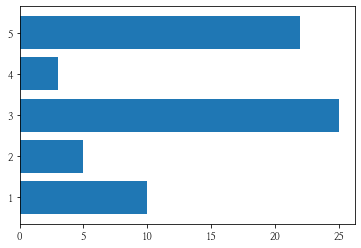

In [ ]:
import matplotlib.pyplot as plt   # plt.barh()
import numpy as np  

x = np.arange(1,6)
y = [10,5,25,3,22]
plt.barh(x,y)
plt.show() 

### 다중그래프 

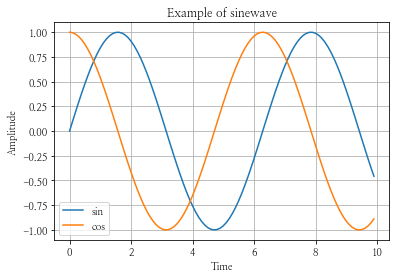

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  

x = np.arange(0,10,0.1)   # 0부터10까지 0.1간격으로 배열
plt.plot(x, np.sin(x),label='sin')    # 선형그래프 두번 사용, x축은 동일. y축을 sin 과 cos
plt.plot(x, np.cos(x),label='cos')

#plt.figure(figsize=(5,3))    # figure()함수를 이용해서, 그래프의 크기를 설정할 수 있음
plt.title('Example of sinewave')
plt.legend()  # 범례표시
plt.grid()  # 격자표시
plt.xlabel('Time')  
plt.ylabel('Amplitude')
plt.show()

### 그래프의 축 정보 변경

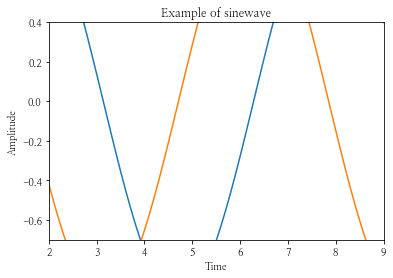

In [ ]:
# 축 정보 변경 (1.범위지정) -> xlim/ylim(최저값, 최고값)함수 사용
import matplotlib.pyplot as plt
import numpy as np  

x = np.arange(0,10,0.1)  
plt.plot(x, np.sin(x),label='sin')    
plt.plot(x, np.cos(x),label='cos')

plt.title('Example of sinewave')
plt.xlabel('Time')  
plt.ylabel('Amplitude')

plt.xlim(2,9)   # plt.xlim(최저값, 최고값)
plt.ylim(-0.7,0.4)   # plt.ylim(최저값, 최고값)
plt.show()

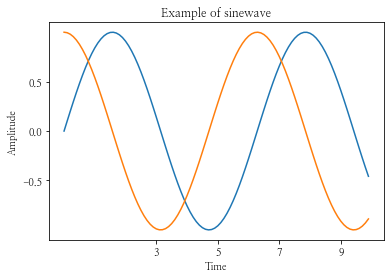

In [ ]:
# 축 정보 변경 (2.눈금표시지정) -> xticks/yticks(list or array)함수 사용
import matplotlib.pyplot as plt
import numpy as np  

x = np.arange(0,10,0.1)  
plt.plot(x, np.sin(x),label='sin')    
plt.plot(x, np.cos(x),label='cos')

plt.title('Example of sinewave')
plt.xlabel('Time')  
plt.ylabel('Amplitude')

plt.xticks(range(3,10,2))   # plt.xticks(list or array)
plt.yticks([-0.5,0,0.5])    # plt.yticks(list or array)
plt.show()

## 2) Matplotlib 2 (DataFrame 활용)



In [ ]:
# DataFrame 데이터생성
import pandas as pd
scores = [[87,76,66],[90,80,70],[88,77,66],[55,65,55],[45,35,70],[90,99,98]]
names = ['철수','영미','길동','찬미','창희','수진']
lectures = ['국어','영어','수학']
df = pd.DataFrame(scores,index=names,columns=lectures)
df

,국어,영어,수학
철수,87,76,66
영미,90,80,70
길동,88,77,66
찬미,55,65,55
창희,45,35,70
수진,90,99,98


### 선형그래프

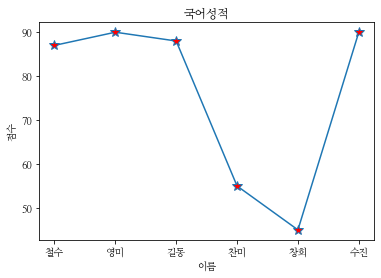

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['국어'],marker='* ',markersize='10',markerfacecolor='red')
plt.title('국어성적')   # x축은 이름,y축은 국어성적
plt.xlabel('이름')
plt.ylabel('점수')
plt.show()

### 복수의 그래프

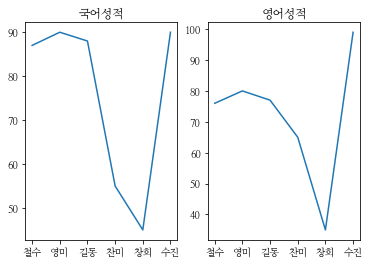

In [ ]:
# 여러 개의 그래프 같이 보여주기 -> # 1. figure()함수로 fig객체를 생성 후, 2. add_subplot()함수 사용
import matplotlib.pyplot as plt
fig = plt.figure()    # 1
sub1 = fig.add_subplot(1,2,1)   # 2  # add_subplot(가로행개수,세로열개수,번째)
sub2 = fig.add_subplot(1,2,2)
sub1.plot(df.index,df['국어'])
sub2.plot(df.index,df['영어'])
sub1.set_title('국어성적')    # set_title()함수 사용
sub2.set_title('영어성적')
plt.show()

### 막대그래프

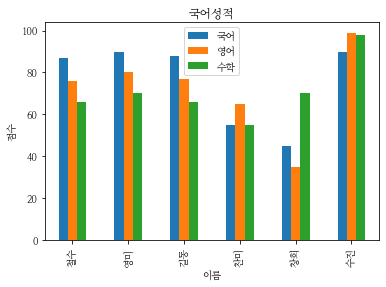

In [ ]:
# 1. plt모듈에서의 plot이 아닌, 객체에서의 plot 함수  -->  kind옵션을 사용해서 그래프형태 명시
df.plot(kind='bar')   #국어그래프 -> df['국어'].plot(kind='bar')
plt.title('국어성적')
plt.xlabel('이름')
plt.ylabel('점수')
plt.show()

### 면적그래프

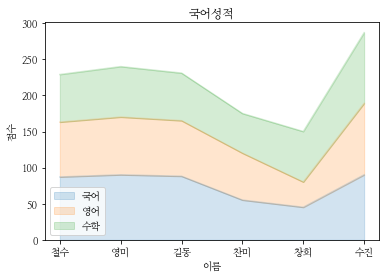

In [ ]:
df.plot(kind='area',alpha=0.2)  # 투명도설정 : alpha = 값(0~1, 0.5가 기준) 
plt.title('국어성적')
plt.xlabel('이름')
plt.ylabel('점수')
plt.show()

### 히스토그램 그래프

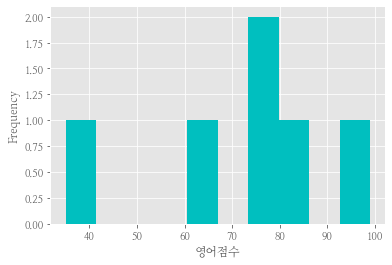

In [ ]:
# 간격,너비,칸,분포 의 개념
import matplotlib.pyplot as plt
plt.style.use('ggplot')   # 격자무늬 넣기
df['영어'].plot(kind='hist', bins =10, color = 'c')
plt.xlabel('영어점수')
plt.show()

### 산포도그래프

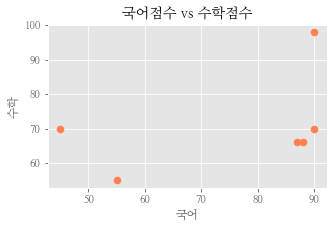

In [ ]:
df.plot(kind='scatter',x='국어',y='수학',c ='coral',s=50,figsize=(5,3))
plt.title('국어점수 vs 수학점수')
plt.show()

### 파이 차트

In [ ]:
# 파이 차트 (를 만들 데이터 추가)
df['성별']=['남','여','남','여','여','남']
df['평균']=df.mean(axis = 1)
df['평균']=df['평균'].astype(int)
df['Pass/Fail']=['P'if each_average >=80 else 'F'for each_average in df['평균']]
df['count']=1
df

,국어,영어,수학,성별,평균,Pass/Fail,count
철수,87,76,66,남,76,F,1
영미,90,80,70,여,80,P,1
길동,88,77,66,남,77,F,1
찬미,55,65,55,여,58,F,1
창희,45,35,70,여,50,F,1
수진,90,99,98,남,95,P,1


In [ ]:
# 성별과 pass/fail을 그룹으로 묶어서 합 구하기
df2=df.groupby(['성별','Pass/Fail']).sum()
df2

국어   영어   수학   평균  count
성별 Pass/Fail                           
남  F          175  153  132  153      2
   P           90   99   98   95      1
여  F          100  100  125  108      2
   P           90   80   70   80      1

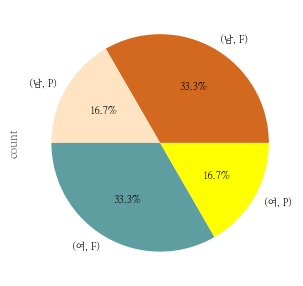

In [ ]:
# 파이차트
# count, 즉 사람 수를 기준으로 파이를 나눔
# autopct는 파이조각의 백분율 (맨뒤%는 파이안의 문자열%를 의미함)
# startangle은 시작각도
df2['count'].plot(kind='pie',figsize=(7,5),autopct='%.1f%%', 
startangle = 0,colors=['chocolate','bisque','cadetblue','yellow'])
plt.show()

### 박스플롯



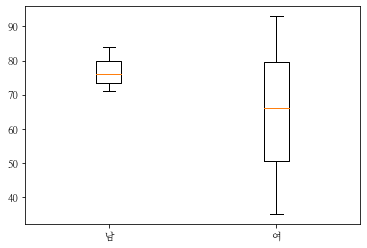

In [ ]:
# 박스플롯 (5개의 통계지표 : 최소값,1분위값,중간값,3분위값,최대값)
import matplotlib.pyplot as plt
#plt.style.use('default')  # 위에 격자무늬 설정한것 default로 전환
plt.boxplot(x = [df[df['성별']=='남']['평균'],df[df['성별']=='여']['평균']],labels=['남','여'])
plt.show()

## 3) Seaborn

In [ ]:
# 데이터프레임 생성
import pandas as pd
scores = [[87,76,66],[21,15,70],[88,86,79],[100,85,95],[55,95,50],[46,99,68]]
names = ['철수','영미','길동','찬미','창희','수진']
lectures = ['국어','영어','수학']
df = pd.DataFrame(scores,index=names,columns=lectures)
df

,국어,영어,수학
철수,87,76,66
영미,21,15,70
길동,88,86,79
찬미,100,85,95
창희,55,95,50
수진,46,99,68


### 히트맵

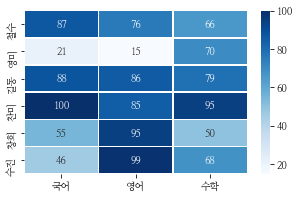

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as sns
plt.figure(figsize = (5,3))
sns.heatmap(df,annot=True,fmt='d',cmap='Blues',linewidth=0.5)
plt.show()

### 이변수그래프

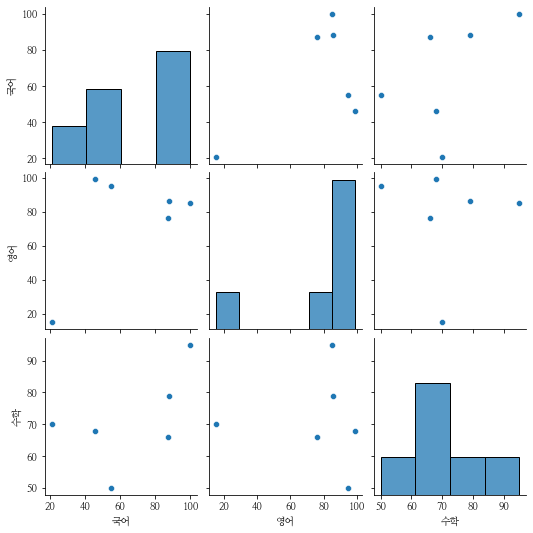

In [ ]:
# DataFrame의 열을 두개씩 짝지을 수있는 모든조합 나타냄
sns.pairplot(df)
plt.show()    #같은변수간에는 히스토그램,다른변수간에는 산점도그래프

### 회귀선이 있는 산포도

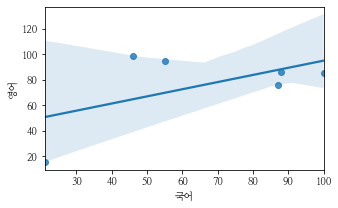

In [ ]:
# 산포도그래프+회귀선 -->  regplot()함수사용
# 회귀선: 산포도에 산재해 있는 점들의 관계에 근거하여 그어진 선
import matplotlib.pyplot as plt  
import seaborn as sns
plt.figure(figsize = (5,3))
sns.regplot(x='국어',y='영어',data=df)
plt.show()  

### 카테고리별 회귀선이 있는 산포도

     국어  영어  수학 성별
철수   87  76  66  남
영미   21  15  70  여
길동   88  86  79  남
찬미  100  85  95  여
창희   55  95  50  여
수진   46  99  68  남


<Figure size 360x216 with 0 Axes>

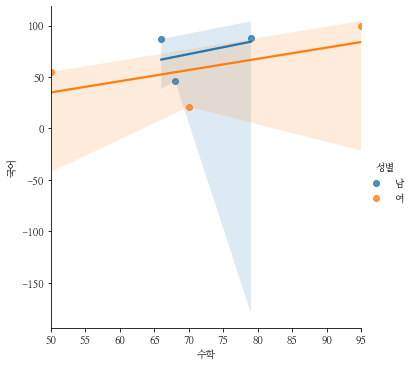

In [ ]:
# 회귀선이 있는 산포도 그래프 2 --> lmplot()함수사용
df['성별'] = ['남','여','남','여','여','남']
print(df)

plt.figure(figsize=(5,3))
sns.lmplot(x='수학',y='국어',hue='성별',data=df)
plt.show()

### 히스토그램&커널밀도

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


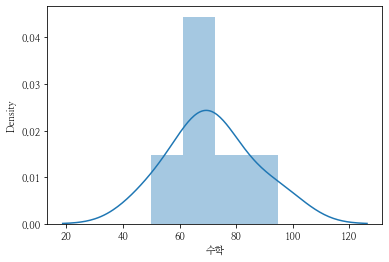

In [ ]:
# 둘다 --> distplot()
plt.figure
sns.distplot(df['수학'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


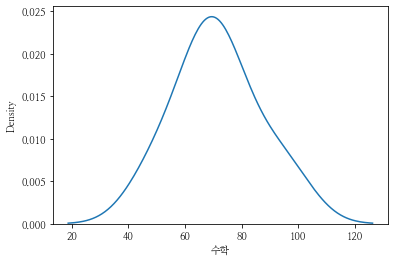

In [ ]:
# 중 커널밀도만 --> distplot( ,hist=False)
plt.figure
sns.distplot(df['수학'],hist=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


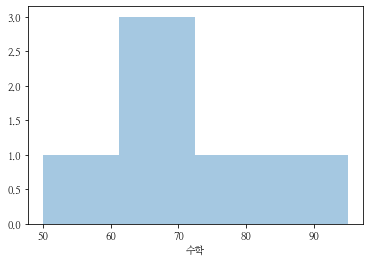

In [ ]:
# 중 히스토그램만 --> distplot( ,kde=False)
plt.figure
sns.distplot(df['수학'],kde=False)
plt.show()

### 막대그래프

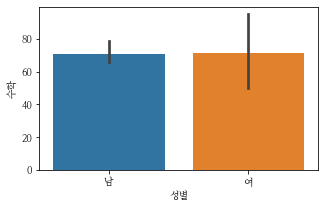

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x='성별',y='수학',data = df)
plt.show()

### 빈도그래프

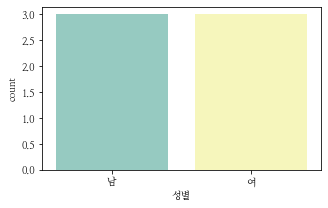

In [ ]:
# countplot()함수 사용
plt.figure(figsize=(5,3))
sns.countplot(x='성별',palette='Set3',data = df)
plt.show()

### 박스플롯 그래프

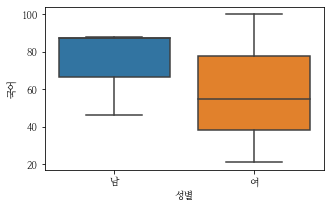

In [ ]:
# = 수염상자 그래프
plt.figure(figsize=(5,3))
sns.boxplot(x='성별',y='국어',data = df)
plt.show()

### 바이올린 그래프

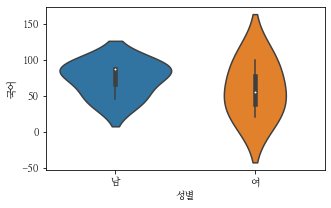

In [ ]:
# 커널밀도 곡선과 박스플롯 합친 형태 --> violinplot()함수 사용
plt.figure(figsize=(5,3))
sns.violinplot(x='성별',y='국어',data = df)
plt.show()

### 화면 그리드로 분할하기

In [ ]:
# 데이터 생성
df['평균']=df.mean(axis = 1)
df['평균']=df['평균'].astype(int)
df['Pass/Fail']=['P'if each_average >=80 else 'F'for each_average in df['평균']]
df['count']=1
df

,국어,영어,수학,성별,평균,Pass/Fail,count
철수,87,76,66,남,76,F,1
영미,21,15,70,여,35,F,1
길동,88,86,79,남,84,P,1
찬미,100,85,95,여,93,P,1
창희,55,95,50,여,66,F,1
수진,46,99,68,남,71,F,1


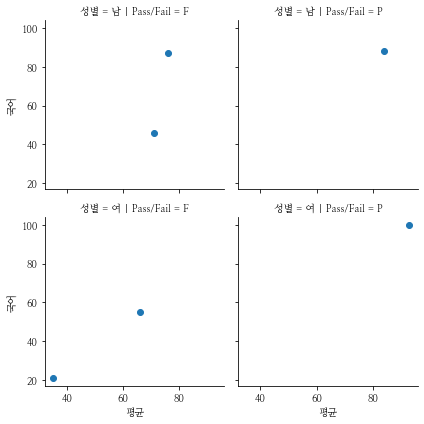

In [ ]:
# 화면을 그리드로 분할하기
# 열은 패스기준으로,행을 성별기준으로
g = sns.FacetGrid (data = df, col='Pass/Fail',row='성별') 
g = g.map(plt.scatter,'평균','국어') # map(호출하고자하는값.넘겨주는값)